In [15]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pdr.get_data_tiingo('AAPL',api_key = "e84e4abbd0616639235a30f7ab0ebb1ac7c6b1f7")

In [3]:
df.to_csv('AAPL.csv')

In [4]:
dataset = pd.read_csv('AAPL.csv')

### Data Exploration and preprocessing

In [6]:
dataset.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2020-09-04 00:00:00+00:00,120.96,123.70,110.89,120.07,332607163,120.96,123.70,110.89,120.07,332607163,0.0,1.0
1255,AAPL,2020-09-08 00:00:00+00:00,112.82,118.99,112.68,113.95,231366563,112.82,118.99,112.68,113.95,231366563,0.0,1.0
1256,AAPL,2020-09-09 00:00:00+00:00,117.32,119.14,115.26,117.26,176940455,117.32,119.14,115.26,117.26,176940455,0.0,1.0
1257,AAPL,2020-09-10 00:00:00+00:00,113.49,120.50,112.50,120.36,182274391,113.49,120.50,112.50,120.36,182274391,0.0,1.0
1258,AAPL,2020-09-11 00:00:00+00:00,112.00,115.23,110.00,114.57,180860325,112.00,115.23,110.00,114.57,180860325,0.0,1.0


In [8]:
close_price = dataset.reset_index()["close"]

In [10]:
close_price

0       115.31
1       116.28
2       116.41
3       113.92
4       113.45
         ...  
1254    120.96
1255    112.82
1256    117.32
1257    113.49
1258    112.00
Name: close, Length: 1259, dtype: float64

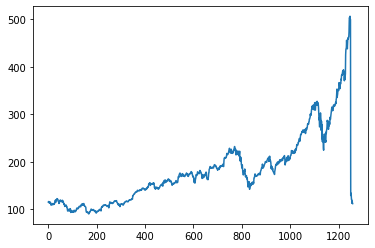

In [12]:
plt.plot(close_price)
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
close_price = scaler.fit_transform(np.array(close_price).reshape(-1,1))

In [17]:
close_price

array([[0.06006013],
       [0.06239327],
       [0.06270595],
       ...,
       [0.06489477],
       [0.0556825 ],
       [0.05209862]])

In [24]:
#train-test split
train_size = int(len(close_price)*0.65)
test_size = len(close_price) - train_size
train_data, test_data = close_price[:train_size],close_price[train_size:]

In [29]:
def create_dataset(dataset, time_step=1):
    dataX,dataY = [],[]
    for i in range(len(dataset) - time_step - 1):
        temp = dataset[i:(i+time_step),0]
        dataX.append(temp)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [33]:
X_train,y_train = create_dataset(train_data,100)
X_test,y_test = create_dataset(test_data,100)

In [41]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

### Creating Stacked LSTM model

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [47]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer='adam')

In [48]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs = 100,batch_size=32)

Epoch 1/100
23/23 [==============================] - 6s 255ms/step - loss: 0.0045 - val_loss: 0.0150
Epoch 2/100
23/23 [==============================] - 4s 173ms/step - loss: 4.5930e-04 - val_loss: 0.0150
Epoch 3/100
23/23 [==============================] - 6s 279ms/step - loss: 2.8818e-04 - val_loss: 0.0147
Epoch 4/100
23/23 [==============================] - 5s 223ms/step - loss: 2.8122e-04 - val_loss: 0.0147
Epoch 5/100
23/23 [==============================] - 6s 257ms/step - loss: 2.7558e-04 - val_loss: 0.0143
Epoch 6/100
23/23 [==============================] - 7s 291ms/step - loss: 2.4841e-04 - val_loss: 0.0137
Epoch 7/100
23/23 [==============================] - 6s 246ms/step - loss: 2.5119e-04 - val_loss: 0.0144
Epoch 8/100
23/23 [==============================] - 7s 302ms/step - loss: 2.3026e-04 - val_loss: 0.0137
Epoch 9/100
23/23 [==============================] - 6s 242ms/step - loss: 2.1539e-04 - val_loss: 0.0132
Epoch 10/100
23/23 [==============================] - 7s 28

23/23 [==============================] - 6s 268ms/step - loss: 7.2608e-05 - val_loss: 0.0040
Epoch 79/100
23/23 [==============================] - 6s 281ms/step - loss: 6.0701e-05 - val_loss: 0.0040
Epoch 80/100
23/23 [==============================] - 5s 227ms/step - loss: 5.7621e-05 - val_loss: 0.0041
Epoch 81/100
23/23 [==============================] - 7s 290ms/step - loss: 6.5958e-05 - val_loss: 0.0041
Epoch 82/100
23/23 [==============================] - 6s 272ms/step - loss: 6.0803e-05 - val_loss: 0.0039
Epoch 83/100
23/23 [==============================] - 5s 234ms/step - loss: 6.0052e-05 - val_loss: 0.0039
Epoch 84/100
23/23 [==============================] - 8s 351ms/step - loss: 6.6977e-05 - val_loss: 0.0038
Epoch 85/100
23/23 [==============================] - 5s 212ms/step - loss: 7.4597e-05 - val_loss: 0.0038
Epoch 86/100
23/23 [==============================] - 7s 319ms/step - loss: 5.6431e-05 - val_loss: 0.0037
Epoch 87/100
23/23 [==============================] - 6s 27

### Evaluating the model

In [51]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [54]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [56]:
from sklearn.metrics import mean_squared_error
print("Training RMSE", np.sqrt(mean_squared_error(y_train,train_predict)))
print("Test RMSE", np.sqrt(mean_squared_error(y_test,test_predict)))

Training RMSE 151.92853316262887
Test RMSE 278.92401018976346


### Visualization

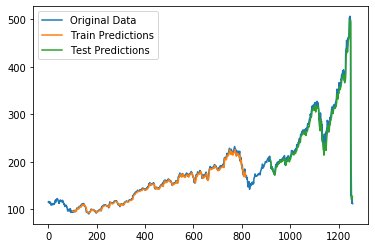

In [63]:
look_back=100
trainPredictPlot = np.empty_like(close_price)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(close_price)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(close_price)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(close_price))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(["Original Data","Train Predictions","Test Predictions"])
plt.show()